<a href="https://colab.research.google.com/github/KavindaRajapaksha/DeepLearning/blob/main/saveAndLoadtfModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
X=tf.range(0,100,2)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
      dtype=int32)>

In [3]:
y=2*X+3
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  3,   7,  11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,
        55,  59,  63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103,
       107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199], dtype=int32)>

In [12]:
X.dtype

tf.int32

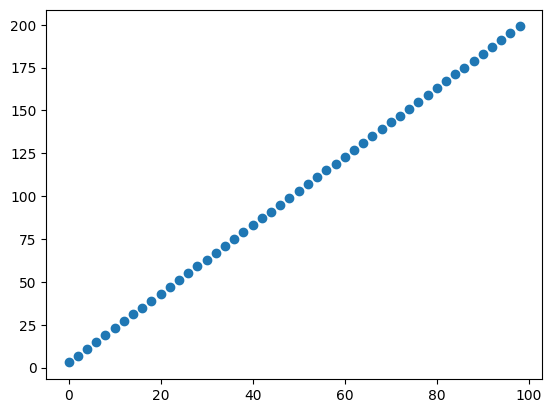

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

## Model Building

In [7]:
#create model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])
#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])
#fit the model
model.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 136.4471 - mae: 136.4471 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 126.8853 - mae: 126.8853
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 121.0626 - mae: 121.0626
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 107.4822 - mae: 107.4822
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 100.1852 - mae: 100.1852
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 92.1486 - mae: 92.1486
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 85.7563 - mae: 85.7563
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 81.4478 - mae: 81.4478
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 65.1994 - mae: 65.1994
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 61.2396 - mae: 61.2396
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 53.2604 - mae: 53.2604 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 42.0870 - mae: 42.0870
Epoch 13/100
2/2 ━━━━━━━━

## Save Model Using SaveModelFormat

In [17]:
model.export('newmodel1')  # For exporting a SavedModel

Saved artifact at 'newmodel1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_6')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136038557970512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136038557965904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136038557966288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136038557964176: TensorSpec(shape=(), dtype=tf.resource, name=None)


Save model using HDF5 format

In [18]:
model.save('newmodel1.h5')

Load model using saved model format

In [19]:
import tensorflow as tf

not support keras 3

load hd5 format

In [21]:
new_model_1 = tf.keras.models.load_model('newmodel1.h5')

In [23]:
import numpy as np

x_input = np.array([[150]])  # Ensure it's a 2D array
prediction = new_model_1.predict(x_input)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[[303.56778]]
